In [71]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc
from textblob import TextBlob
from nltk import word_tokenize, pos_tag, ne_chunk
import os
import string
color = sns.color_palette()
import spacy
import re
from nltk.tokenize import RegexpTokenizer
%matplotlib inline

from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb
import os
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
from nltk import FreqDist
import copy
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [10]:
train=pd.read_csv('drugsComTrain_raw.tsv',sep='\t')
test=pd.read_csv('drugsComTest_raw.tsv',sep='\t')

In [11]:
print('train shape:',train.shape)
print('test shape:',test.shape)

train shape: (161297, 7)
test shape: (53766, 7)


In [12]:
df=pd.concat([train,test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [75]:
df.describe()

,rating,usefulCount
count,159328.000000,159328.000000
mean,6.992349,28.272934
std,3.273850,36.616053
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,37.000000
max,10.000000,1291.000000


In [13]:
df.isnull().sum()

Unnamed: 0        0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.drop(['Unnamed: 0','date'],axis=1,inplace=True)

In [39]:
condition_df=df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_df=pd.DataFrame(condition_df).reset_index()

In [40]:
condition_df

,condition,drugName
0,Pain,219
1,Birth Control,181
2,High Blood Pressure,146
3,Acne,127
4,Depression,115
...,...,...
830,"Delayed Puberty, Male",1
831,Amyotrophic Lateral Sclerosis,1
832,Intermittent Explosive Disorde,1
833,"Paragonimus westermani, Lung Fluke",1


Text(0.5, 1.0, 'Top20 : The number of drugs per condition')

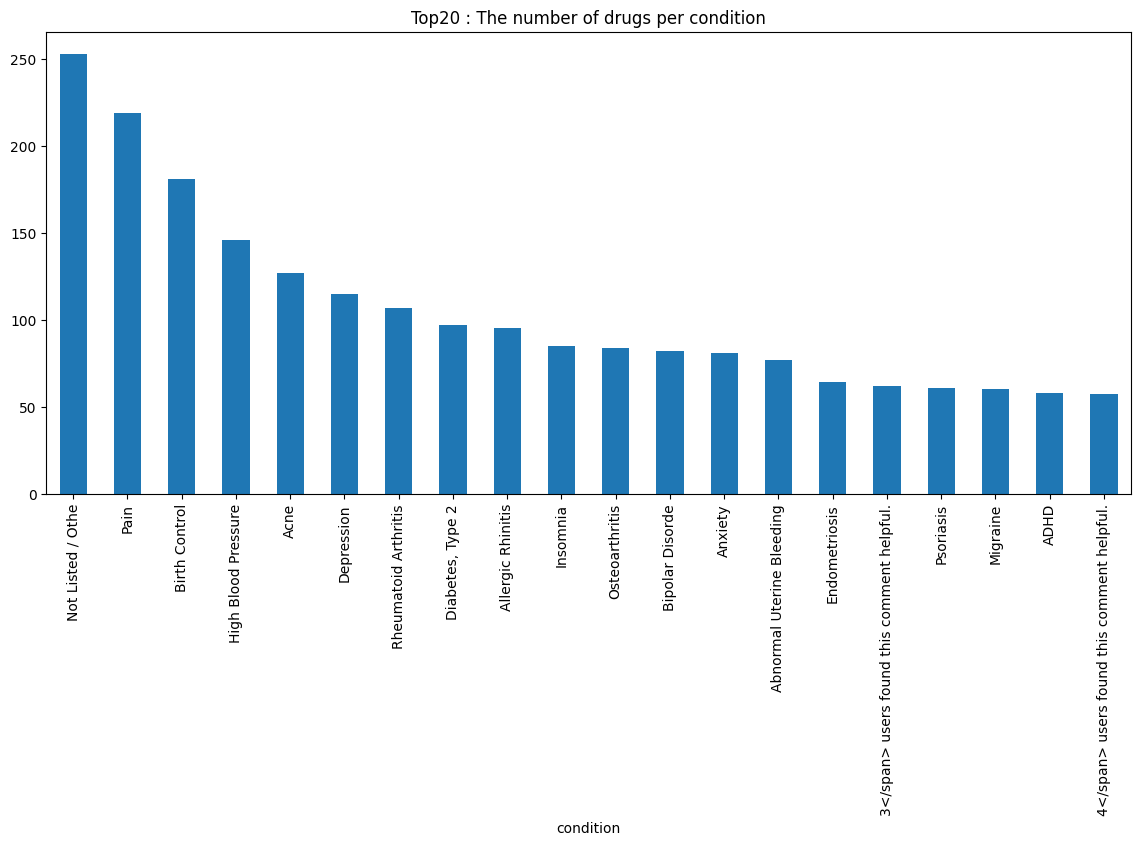

In [20]:
condition_df[:20].plot(kind='bar',figsize=(14,6))
plt.title('Top20 : The number of drugs per condition')

In [22]:
print('data before')
print(df.shape)
df=df[~df.condition.str.contains('</span>',na=False)]
df=df[df['condition']!='Not Listed / Othe']
print('data after')
print(df.shape)

data before
(213869, 5)
data after
(212106, 5)


In [54]:
condition_1=condition_df[condition_df['drugName']==1].reset_index()
all_list=set(df.index)
condition_list=[]
for i,j in enumerate(df['condition']):
    for c in list(condition_1['condition']):
        if j==c:
            condition_list.append(i)
new_idx=all_list-set(condition_list)
df=df.iloc[list(new_idx)].reset_index()
del df['index']

Text(0.5, 1.0, 'Top20 : The number of drug per condition')

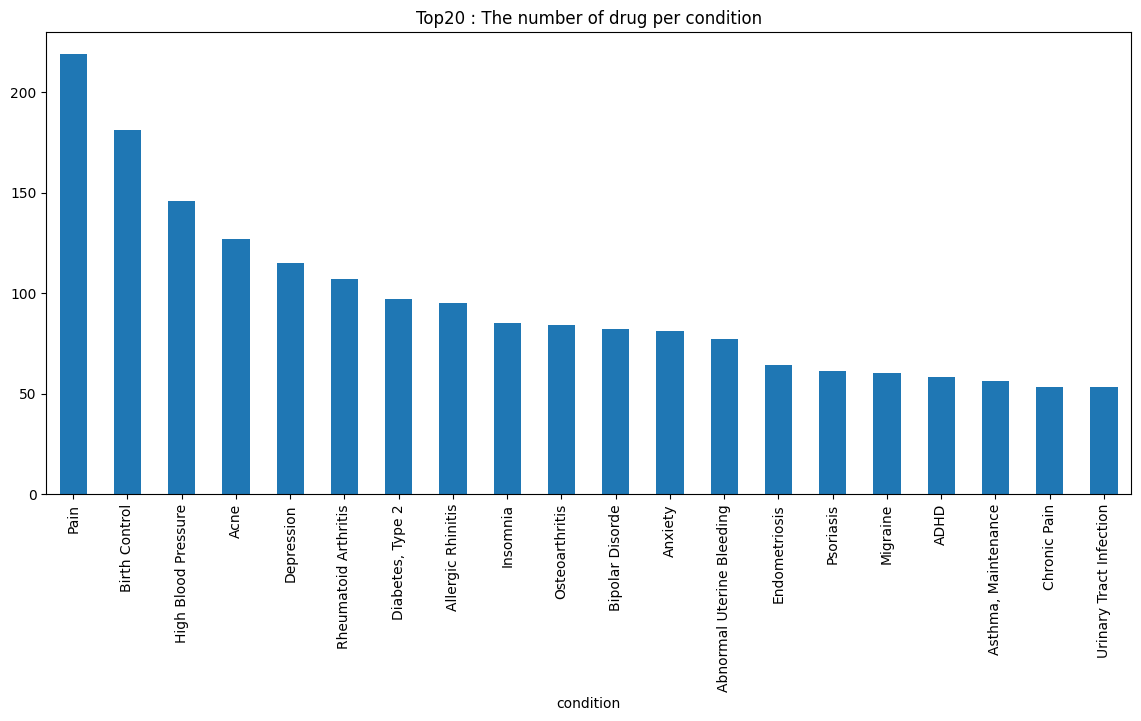

In [23]:
condition_df=df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_df[:20].plot(kind='bar',figsize=(14,6))
plt.title('Top20 : The number of drug per condition')

Text(0.5, 1.0, 'Count of rating values')

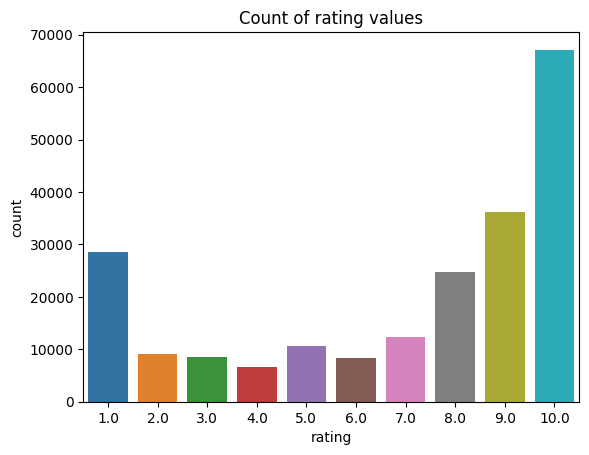

In [27]:
sns.countplot(x='rating',data=df)
plt.title('Count of rating values')

Text(0.5, 1.0, 'Count of useful values')

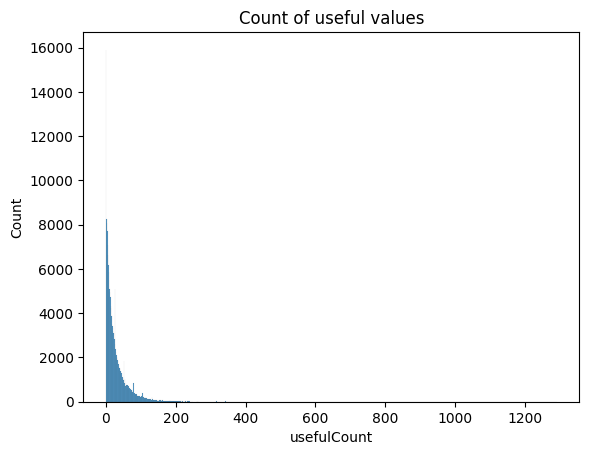

In [33]:
sns.histplot(x='usefulCount',data=df)
plt.title('Count of useful values')

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goqls\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [58]:
stops=set(stopwords.words('english'))
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

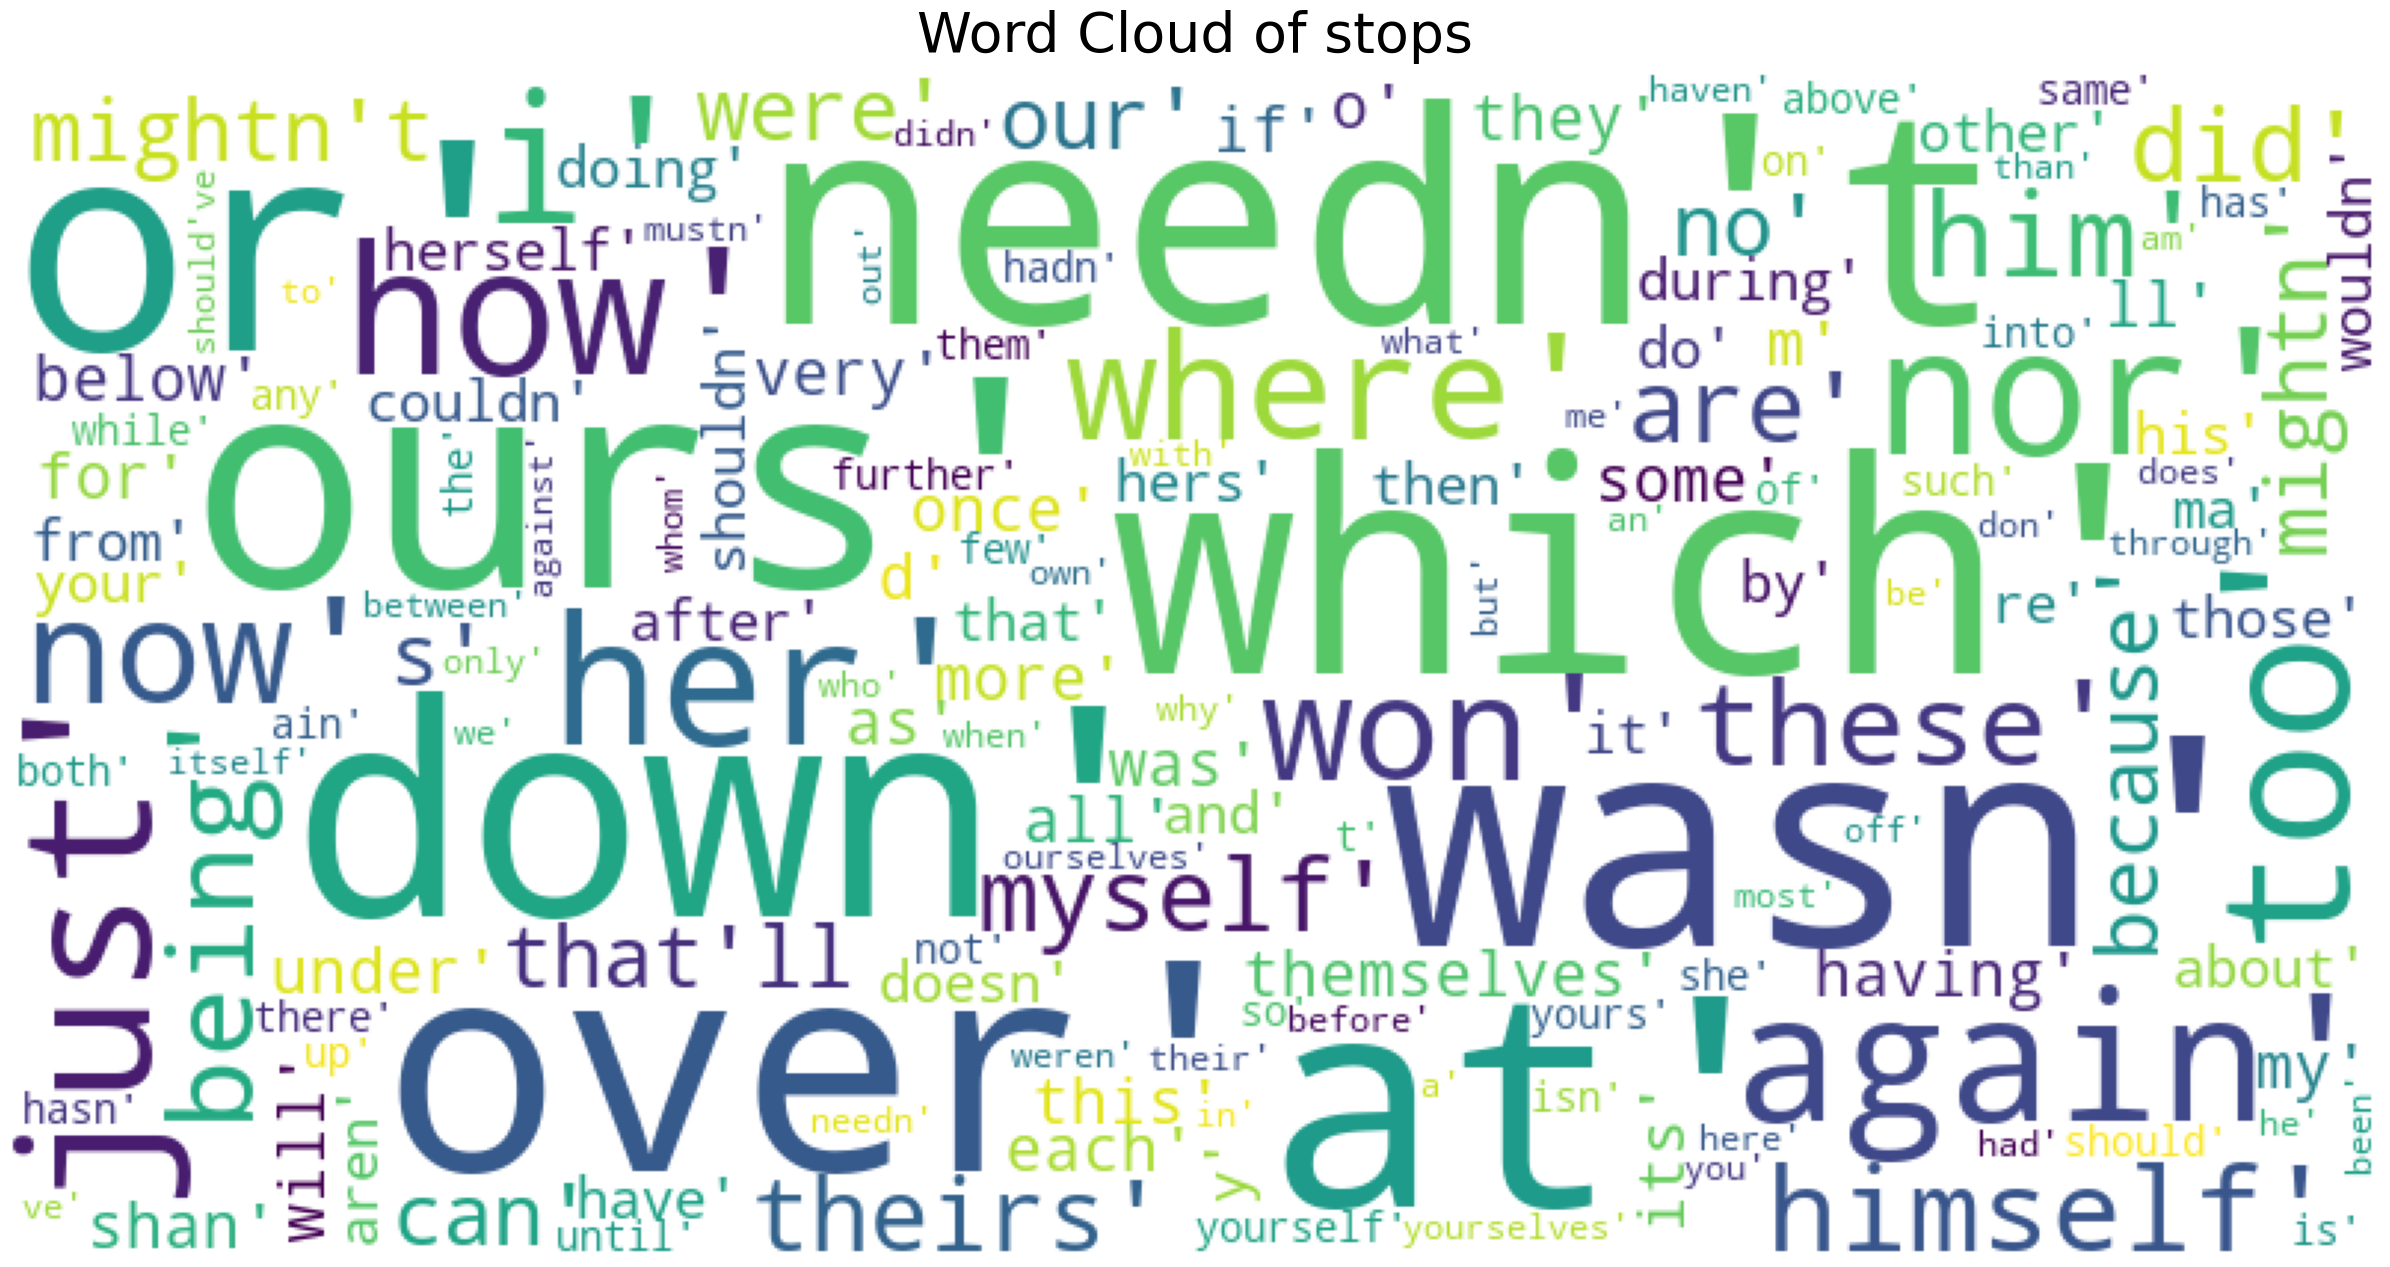

In [65]:
def plot_wordcloud(text,mask=None,max_words=200,max_font_size=100,figure_size=(24,16),title=None,title_size=40,image_color=False):
    stopwords=set(STOPWORDS)
    more_stopwords={'one','br','Po','th','sayi','fo','Unknown'}
    stopwords=stopwords.union(more_stopwords)
    wordcloud=WordCloud(background_color='white',
        stopwords=stopwords,
        max_words=max_words,
        max_font_size=max_font_size,
        random_state=42,
        width=800,
        height=400,
        mask=mask)
    wordcloud.generate(str(text))
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors=ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
        plt.title(title, fontdict={'size': title_size,'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()  
    
plot_wordcloud(stops, title="Word Cloud of stops")                          

In [66]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [69]:
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [72]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [74]:
%time df['review_clean'] = df['review'].apply(review_to_words)

CPU times: total: 33.5 s
Wall time: 2min 3s
